In [ ]:
#Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer, word_tokenize 
from nltk.corpus import stopwords

import re
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#import data
train=pd.read_csv("drive/MyDrive/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv",encoding='latin1')
test=pd.read_csv("drive/MyDrive/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv",encoding='latin1')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
train['OriginalTweet']=train['OriginalTweet'].astype(str)
train['Sentiment']=train['Sentiment'].astype(str)
test['OriginalTweet']=test['OriginalTweet'].astype(str)
test['Sentiment']=test['Sentiment'].astype(str)

In [ ]:
#look at NaN
nan = pd.DataFrame(train.isna().sum(), columns = ['NaN_sum'])
num_of_rows=41157
nan['Perc(%)'] = (nan['NaN_sum']/num_of_rows)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan

,NaN_sum,Perc(%)
Location,8590,20.871298


In [ ]:
#distribution of labels
train.Sentiment.value_counts(normalize= True)

Positive              0.277523
Negative              0.240955
Neutral               0.187404
Extremely Positive    0.160945
Extremely Negative    0.133173
Name: Sentiment, dtype: float64

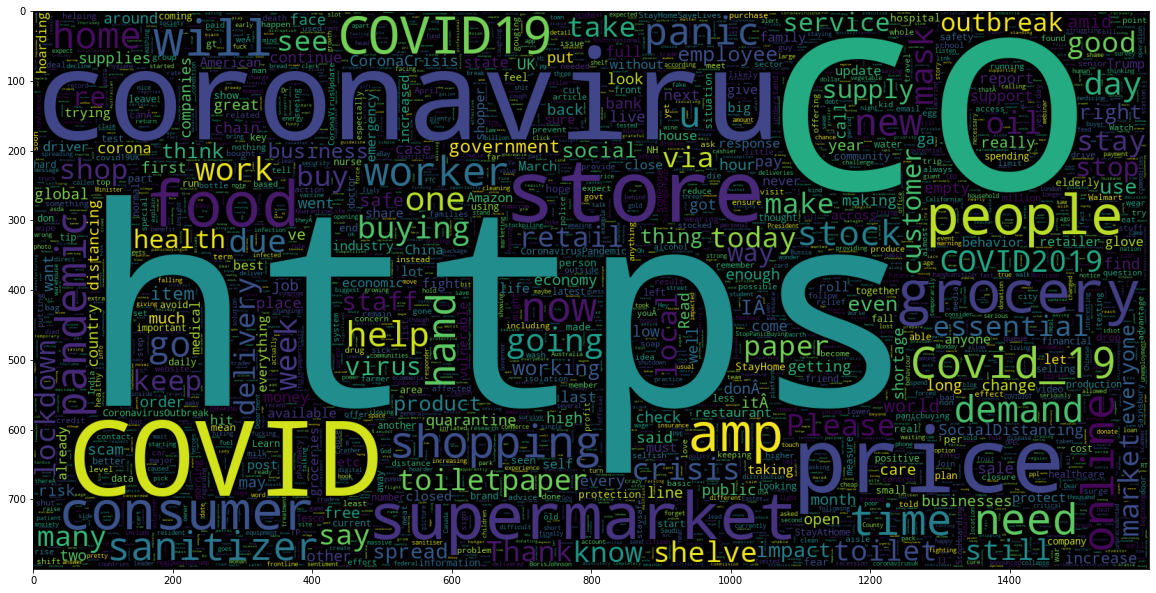

In [ ]:
from wordcloud import WordCloud
text=list(train['OriginalTweet'])
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 35900 , width = 1600 , height = 800,collocations=False).generate(" ".join(text))
plt.imshow(wc)

In [ ]:
#data preprocessing
X = train['OriginalTweet'].copy()
y = train['Sentiment'].copy()


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def data_cleaner(tweet):
    # remove html tags
    tweet = re.sub(r'<.*?>',' ', tweet)
    # remove urls
    tweet = re.sub(r'http\S+', ' ', tweet)
    # remove hashtags
    tweet = re.sub(r'#\w+',' ', tweet)
    # remove mentions
    tweet = re.sub(r'@\w+',' ', tweet) 
    # remove digits
    tweet = re.sub(r'\d+',' ', tweet)
    #removing stop words
    tweet = tweet.split()
    stop_words = stopwords.words('english')
    tweet = " ".join([word for word in tweet if not word in stop_words])  
    return tweet

X = X.apply(data_cleaner)
X.head()

0                                                     
1    advice Talk neighbours family exchange phone n...
2    Coronavirus Australia: Woolworths give elderly...
3    My food stock one empty... PLEASE, panic, THER...
4    Me, ready go supermarket outbreak. Not I'm par...
Name: OriginalTweet, dtype: object

In [ ]:
#feature encoding
encoding = {'Extremely Negative': 0,
            'Negative': 1,
            'Neutral': 2,
            'Positive':3,
            'Extremely Positive': 4
           }

y.replace(encoding, inplace=True)

In [ ]:
# # Let us now split the dataset into training and validation sets
# split_pcent = 0.20  # How much percent of data should go into testing set
# split = int(split_pcent * len(X))

# valid_set = X[:split]   # Get everything till split number
# train_set = X[split:]   # Get everything after split number
# valid_y = y[:split]
# train_y = y[split:]
# valid_set,train_set,valid_y,train_y = pd.DataFrame(valid_set),pd.DataFrame(train_set),pd.DataFrame(valid_y),pd.DataFrame(train_y)



In [ ]:
# frame1=[train_set,train_y]
# frame2=[valid_set,valid_y]
# train_set = pd.concat(frame1)
# valid_set = pd.concat(frame2)

In [ ]:
X1,y1 = pd.DataFrame(X),pd.DataFrame(y)
frame = [X1, y1]
train = pd.concat(frame, axis=1)
train.head()


,OriginalTweet,Sentiment
0,,2
1,advice Talk neighbours family exchange phone n...,3
2,Coronavirus Australia: Woolworths give elderly...,3
3,"My food stock one empty... PLEASE, panic, THER...",3
4,"Me, ready go supermarket outbreak. Not I'm par...",0


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

from fastai.text.all import *

     |████████████████████████████████| 727kB 8.1MB/s 
     |████████████████████████████████| 1.2MB 11.3MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 194kB 46.0MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
Mounted at /content/gdrive


In [ ]:
!pip install fastai==2.0.11


     |████████████████████████████████| 358kB 9.2MB/s 
ERROR: fastbook 0.0.16 has requirement fastai>=2.1, but you'll have fastai 2.0.11 which is incompatible.
  Found existing installation: fastai 2.2.7
    Uninstalling fastai-2.2.7:
      Successfully uninstalled fastai-2.2.7


In [ ]:
dls = TextDataLoaders.from_df(train, valid_pct = 0.1, text_col = 'OriginalTweet', label_col = 'Sentiment', bs = 64, is_lm = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [ ]:
dls.show_batch()


,text,text_
0,"xxbos xxmaj why arms this ? xxmaj supply & & demand surely . xxmaj they seem problem beloved hike prices busy times emergency . xxmaj xxunk xxbos xxup bout xxup hit xxup grocery xxup store since xxup they talking xxup about xxup mandatory xxup quarantine … i xxup refused xxup for awhile , xxup but xxup about xxup to get xxup serious xxbos âit worldwide problem . xxmaj we work xxunk xxmaj","xxmaj why arms this ? xxmaj supply & & demand surely . xxmaj they seem problem beloved hike prices busy times emergency . xxmaj xxunk xxbos xxup bout xxup hit xxup grocery xxup store since xxup they talking xxup about xxup mandatory xxup quarantine … i xxup refused xxup for awhile , xxup but xxup about xxup to get xxup serious xxbos âit worldwide problem . xxmaj we work xxunk xxmaj male"
1,"others ! ! ? xxbos xxunk xxmaj will alright , doubt that , shoved rear xxunk , buying loo roll idiot . xxmaj but plenty frail old people & & sick thanks idiots greed unable buy goods onl xxbos quickly taking feel third world country . xxbos xxmaj covid- xxmaj malaysia : essential goods . xxmaj this morning i saw people queuing supermarket , one person family . xxmaj no panic -","! ! ? xxbos xxunk xxmaj will alright , doubt that , shoved rear xxunk , buying loo roll idiot . xxmaj but plenty frail old people & & sick thanks idiots greed unable buy goods onl xxbos quickly taking feel third world country . xxbos xxmaj covid- xxmaj malaysia : essential goods . xxmaj this morning i saw people queuing supermarket , one person family . xxmaj no panic - buying"
2,"cr nation fight ; reduce prices sanitizers , handwash & & floor cleaners % * xxbos i tried book slot online shopping & & - literally slots . xxmaj this crazy ! xxmaj sainsburyâs full next weeks xxrep 3 ! i guess diet really start tomorrow … ? xxbos xxmaj las xxmaj vegas xxmaj real xxmaj estate xxmaj march : xxmaj sales . % yoy , xxmaj inventory % yoy xxbos -","nation fight ; reduce prices sanitizers , handwash & & floor cleaners % * xxbos i tried book slot online shopping & & - literally slots . xxmaj this crazy ! xxmaj sainsburyâs full next weeks xxrep 3 ! i guess diet really start tomorrow … ? xxbos xxmaj las xxmaj vegas xxmaj real xxmaj estate xxmaj march : xxmaj sales . % yoy , xxmaj inventory % yoy xxbos - xxup"
3,"sanitizer complex respirators combat surging pandemic . xxbos xxmaj just stay safe side i randomly drink hand sanitizer xxmaj so far strategy seems working xxbos know majority & & supermarket workers xxup amazing xxup job experienced xxunk xxunk , life risking tactic . xxmaj please help . xxmaj all emails & & iâve xxunk store days xxunk xxbos xxmaj coronavirus xxmaj lockdown amp xxmaj hiring xxmaj locksmith xxmaj everything need know hiring","complex respirators combat surging pandemic . xxbos xxmaj just stay safe side i randomly drink hand sanitizer xxmaj so far strategy seems working xxbos know majority & & supermarket workers xxup amazing xxup job experienced xxunk xxunk , life risking tactic . xxmaj please help . xxmaj all emails & & iâve xxunk store days xxunk xxbos xxmaj coronavirus xxmaj lockdown amp xxmaj hiring xxmaj locksmith xxmaj everything need know hiring locksmith"
4,"xxmaj you think bad ? xxmaj what happens supply chain fails ? xxmaj huh , what 's that ? xxmaj those making delivering goods . xxmaj let 's say % long haul truck drivers get sick , ca n't drive . million xxmaj americans . xxmaj xxunk xxbos xxmaj decided use time nursing shift make colleagues smile bullshit xxbos xxmaj when canât find toilet paper ? xxbos xxmaj went grocery store opened","you think bad ? xxmaj what happens supply chain fails ? xxmaj huh , what 's that ? xxmaj those making delivering goods . xxmaj let 's say % long haul truck drivers get sick , ca n't drive . million xxmaj americans . xxmaj xxunk xxbos xxmaj decided use time nursing shift make colleagues smile bullshit xxbos xxmaj when canât find toilet paper ? xxbos xxmaj went grocery store opened people"
5,"piling xxmaj 

In [ ]:
learn = language_model_learner(dls, AWD_LSTM, drop_mult = 0.3)


SuggestedLRs(lr_min=0.05248074531555176, lr_steep=0.015848932787775993)

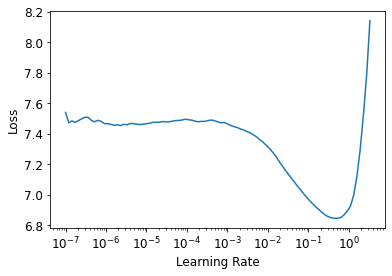

In [ ]:
learn.lr_find()


In [ ]:
learn.save('fine_tuned')
learn.save_encoder('fine_tuned_enc')

In [ ]:
TEXT = "This pandemic is destroying our lives"
N_WORDS = 40
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) 
         for _ in range(N_SENTENCES)]

In [ ]:
print("\n".join(preds))


This pandemic is destroying our lives and life , and is the most dangerous thing to ever happen in at least a decade . On Twitter , the World Health Organization ( WHO ) has said that " the
This pandemic is destroying our lives and lives , and we 're going at home in the hope that our goals will fall , and that we need to be doomed to defeat the threat that we have provided to our people . We all


In [ ]:
data_class = TextDataLoaders.from_df(train, valid_pct = 0.1, text_col = 'OriginalTweet', label_col = 'Sentiment', bs = 64, text_vocab = dls.vocab)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [ ]:
data_class.show_batch()


,text,category
0,"xxbos xxrep 5 ? ? ? xxrep 7 ? ? ? xxrep 7 ? xxrep 4 ? xxrep 4 ? xxrep 11 ? ? ? xxrep 6 ? xxrep 4 ? , xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 3 ? ? ? ? ? xxrep 4 ? ? ? xxrep 3 ? , xxrep 4 ? ? ? ? ? xxrep 6 ? xxrep 3 ? xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? xxrep 5 ? xxrep 6 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 4 ? ? ? xxrep 4 ? xxrep 6 ? xxrep 4 ? xxrep 8 ? ? ? xxrep 6 ? ? ? xxrep 5 ? ? ? xxrep 3 ? xxrep 4 ? ? ? xxrep 7 ? xxrep 5 ? - xxrep 8 ? xxrep 5 ?",2
1,xxbos ? ? xxrep 9 ? ? ? ? xxrep 6 ? xxrep 5 ? ? xxrep 6 ? ? ? xxrep 4 ? xxrep 4 ? xxrep 4 ? xxrep 6 ? xxrep 4 ? xxrep 3 ? xxrep 3 ? xxrep 4 ? xxrep 3 ? ? ? . xxrep 4 ? xxrep 10 ? xxrep 3 ? xxrep 4 ? xxrep 3 ? ? ? . ? ? ? ? xxrep 3 ? ? xxrep 4 ? xxrep 4 ? xxrep 4 ? xxrep 5 ? ? ? xxrep 3 ? ? ? xxrep 6 ? ? ? xxrep 3 ? xxrep 7 ? ? ? xxrep 3 ? xxrep 3 ? ? ? ? ? xxrep 5 ? xxrep 3 ? ? ? xxrep 4 ? xxrep 5 ? . xxrep 3 ? xxrep 3 ? ? ? ? ? xxrep 5 ? ? ?,2
2,"xxbos xxup covid- â xxmaj by xxmaj maria xxmaj xxunk xxmaj xxunk , "" to xxmaj whom xxmaj do xxmaj we xxmaj pray , xxmaj who xxmaj has xxmaj the xxmaj cure . xxmaj why xxmaj are xxmaj the xxmaj grocery xxmaj stores xxmaj and xxmaj online xxmaj shopping xxmaj out xxmaj of xxmaj xxunk xxmaj of xxmaj most xxmaj xxunk , xxmaj of xxmaj my xxmaj grocery xxmaj list . xxmaj why xxmaj are xxmaj our xxmaj elders xxmaj scared , xxmaj and xxmaj yet xxmaj making xxmaj sure xxmaj everyone xxmaj is xxmaj wearing a xxmaj facemask .",3
3,xxbos xxup for xxup any xxup friends xxup or xxup followers i xxup see xxup who xxup should xxup be xxup in xxup self xxup quarantine xxup and xxup you re xxup wandering xxup aimlessly xxup through a xxup supermarket xxup or xxup what xxup have xxup you xxup xxunk xxup spreading xxup corona xxup onto xxup every xxup item xxup and xxup person xxup you xxup encounter i xxup will xxup as a xxup good xxup citizen xxup be xxup xxunk xxup your xxup ass xxup into xxup xxunk,3
4,xxbos xxmaj dr xxmaj xxunk xxmaj mirza : xxup mbbs - xxup rmc xxmaj pakistan msc xxmaj public xxmaj health - xxup lsh xxup uk . ex - global xxmaj coordinator xxup who . ex - regional xxmaj adviser xxup who . xxmaj founder & & xxmaj executive xxmaj coordinator - xxmaj the xxmaj network xxmaj consumer xxmaj protection xxmaj pakistan xxmaj my lord : ba - xxmaj national xxmaj college xxmaj karachi . xxup llb - xxmaj sindh xxmaj muslim xxmaj law college .,2
5,xxbos xxup people xxup are xxup scared xxup not xxup greedy xxup they xxup want xxup to xxup assure xxup they xxup can xxup feed xxup their xxup kids xxup we xxup need xxup to xxup come xxup together xxup and xxup the xxup supermarket xxup market xxup need xxup to xxup stop xxup service xxup idiots xxup clearing xxup shelves xxup police xxup need xxup to xxup be xxup in xxup supermarkets xxup reminding xxup of xxup social xxup distancing xxup and xxup calm,3
6,"xxbos xxup boc : xxup regular xxup boc xxup survey xxup pre - covid- xxup shows xxup firms xxup planned xxup modest xxup increases xxup in xxup capital xxup spending xxup on xxup machinery xxup and xxup equipment ; xxup hiring xxup plans xxup xxunk xxup as xxup firms xxup in xxup xxunk xxup signal xxup reductions xxup due xxup to xxup falling xxup oil xxup prices , xxup but xxup it - related xxup firms xxup intend xxup to xxup add xxup staff .",1
7,"xxbos xxup this xxup is xxup why xxup the xxup is xxup so xxup contagious , a xxup single xxup cough xxup can xxup spread xxup across a xxup supermarket xxup aisle xxup right xxup over xxup the xxup aisle xxup and xxup into xxup the xxup next xxup aisle , xxup gross xxrep 4 ! xxup what xxup took xxup you xxup so xxup long xxup to xxup sign xxup an xxup eo xxup making xxup people",0
8,"xxbos xxmaj hey , : u xxmaj guys xxmaj see xxmaj what 's xxmaj going xxmaj on , , xxmaj who xxmaj are xxmaj richer , xxmaj are xxmaj able xxmaj to xxmaj buy xxmaj supplies xxmaj even xxmaj at xxmaj higher xxmaj prices xxmaj while u xxmaj guys xxmaj ca n't ! xxmaj maybe xxmaj it 's xxmaj time xxmaj

In [ ]:
f1score_multi = F1ScoreMulti()
learn = text_classifier_learner(data_class, AWD_LSTM, drop_mult=0.5, metrics=[accuracy])
#Precision(average='micro'), Recall(average='micro')])
learn.load_encoder('fine_tuned_enc')

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=1.0964781722577754e-06)

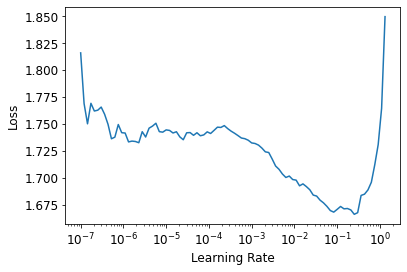

In [ ]:
learn.lr_find()


In [ ]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.500535,1.382596,0.400486,00:50
1,1.440825,1.345775,0.421142,00:50
2,1.411449,1.324109,0.427217,00:50
3,1.393982,1.310587,0.434022,00:50
4,1.396183,1.312900,0.432321,00:50


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.956122,0.783612,0.718834,01:02
1,0.693287,0.556480,0.814581,01:01
2,0.560290,0.533583,0.813123,01:01
3,0.419374,0.526165,0.823329,01:00
4,0.371519,0.534512,0.827461,01:01


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(k = 5)

,input,target,predicted,probability,loss
0,xxbos xxmaj our xxmaj xxunk branch staff encouraged people practice xxmaj social xxmaj distancing also provided sanitizer . xxmaj letâs fight pandemic together .,0,3,0.9366117715835571,9.604477882385254
1,xxbos xxmaj please supermarket xxunk,0,3,0.9848355054855347,9.21365737915039
2,"xxbos xxmaj went local xxmaj martin 's grocery store today . xxmaj they toilet paper , paper towels , xxmaj purell , bread , eggs , ice cream & & frozen foods like xxmaj xxunk xxunk vegetables . xxmaj the manager told frozen food trucks xxup days .",0,3,0.9027390480041504,8.46956729888916
3,"xxbos xxmaj law xxmaj xxunk , xxup llc gives consumers advice xxup covid- . xxmaj when dealing emergency situation one dealing now , paying bills might best thing do . xxmaj watch latest video learn more !",0,3,0.8683681488037109,7.934278964996338
4,"xxbos ? ? xxmaj the current situation xxmaj xxunk . xxmaj we 're quarantined government . xxmaj restaurants , cafes , shopping malls open . xxmaj the food , toilet paper , kitchen paper tissues stock . ( there 're hoarding xxunk ) . (",0,2,0.9644839763641357,7.745296001434326


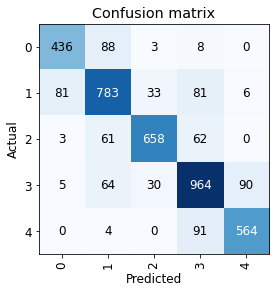

In [ ]:
interp.plot_confusion_matrix()


In [ ]:
interp.print_classification_report()


              precision    recall  f1-score   support

           0       0.83      0.81      0.82       535
           1       0.78      0.80      0.79       984
           2       0.91      0.84      0.87       784
           3       0.80      0.84      0.82      1153
           4       0.85      0.86      0.86       659

    accuracy                           0.83      4115
   macro avg       0.84      0.83      0.83      4115
weighted avg       0.83      0.83      0.83      4115



In [ ]:
print(classification_report(y_test, prediction, target_names=labels))

In [ ]:
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [ ]:
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                    
#                         stop_words='english')

# # We transform each text into a vector
# features = tfidf.fit_transform(X).toarray()

In [ ]:
# models = [
#     RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
#     LinearSVC(),
#     MultinomialNB(),
# ]

# # 5 Cross-validation
# CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))

# entries = []
# for model in models:
#   model_name = model.__class__.__name__
#   accuracies = cross_val_score(model, features, y, scoring='accuracy', cv=CV)
#   for fold_idx, accuracy in enumerate(accuracies):
#     entries.append((model_name, fold_idx, accuracy))
    
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
# mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
# std_accuracy = cv_df.groupby('model_name').accuracy.std()

# acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
#           ignore_index=True)
# acc.columns = ['Mean Accuracy', 'Standard deviation']
# acc